#### 시작하기 전에 설치하기

- install.packages("stringr")
- install.packages("Rcpp")
- install.packages("usethis")
- install.packages("glue")

- install.packages("devtools")
    library(devtools)
- install.packages("remotes")
    library(remotes)
    
-> R studio 나중에 다시 실행

# 9. 데이터 분석 프로젝트
- '한국인의 삶을 파악하라!' 

## 9-1.'한국복지패널데이터' 분석 준비하기 
한국복지패널데이터 
- 한국보건사회연구원 발간 
- 가구의 경제활동을 연구해 정책 지원에 반영할 목적 
- 2006~2015년까지 전국에서 7000여 가구를 선정해 매년 추적 조사 
- 경제활동, 생활실태, 복지욕구 등 수천 개 변수에 대한 정보로 구성 

## 데이터 분석 준비하기 

### 패키지 준비하기

In [1]:
install.packages('foreign')

Installing package into 'C:/Users/admin/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'foreign' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\admin\AppData\Local\Temp\Rtmp84ztEd\downloaded_packages


In [2]:
install.packages('readxl')

Installing package into 'C:/Users/admin/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'readxl' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\admin\AppData\Local\Temp\Rtmp84ztEd\downloaded_packages


In [3]:
library(foreign)             # SPSS 파일 로드
library(dplyr)               # 전처리
library(ggplot2)             # 시각화
library(readxl)              # 엑셀 파일 불러오기


Warning message:
"package 'foreign' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'readxl' was built under R version 3.6.3"

### 데이터 준비하기

In [5]:
# 데이터 불러오기
raw_welfare <- read.spss(file = "./Rdata/Koweps_hpc10_2015_beta1.sav",
                         to.data.frame = T)

Warning message in read.spss(file = "./Rdata/Koweps_hpc10_2015_beta1.sav", to.data.frame = T):
"./Rdata/Koweps_hpc10_2015_beta1.sav: Compression bias (0) is not the usual value of 100"

In [6]:
# 복사본 만들기
welfare <- raw_welfare

### 데이터 검토하기
- 대규모 데이터는 변수가 많고 변수명이 코드로 되어 있어서 전체 데이터 구조를 한눈에 파악하기 어려움 
- 변수명을 쉬운 단어로 바꾼 후 분석에 사용할 변수들 각각 파악해야 함 

In [10]:
head(welfare) 
#tail(welfare) 
#View(welfare) 
dim(welfare) 
#str(welfare) 
summary(welfare)

h10_id,h10_ind,h10_sn,h10_merkey,h_new,h10_cobf,h10_reg5,h10_reg7,h10_din,h10_cin,...,c1007_4aq19,c1007_4aq20,c1007_4aq21,c1007_4aq22,c1007_4aq23,h10_pers_income1,h10_pers_income2,h10_pers_income3,h10_pers_income4,h10_pers_income5
1,1,1,10101,0,NA,1,1,864,864,...,NA,NA,NA,NA,NA,NA,NA,NA,0,NA
2,1,1,20101,0,NA,1,1,600,600,...,NA,NA,NA,NA,NA,NA,NA,NA,0,NA
3,1,1,30101,0,NA,1,1,1571,1619,...,NA,NA,NA,NA,NA,NA,1440,NA,0,NA
4,1,1,40101,0,NA,1,1,3579,3687,...,NA,NA,NA,NA,NA,NA,2400,NA,0,NA
4,1,1,40101,0,NA,1,1,3579,3687,...,NA,NA,NA,NA,NA,NA,NA,NA,0,NA
6,1,1,60101,0,NA,1,1,3030,3486,...,NA,NA,NA,NA,NA,NA,NA,3000,0,NA


[1] 16664   957

     h10_id        h10_ind           h10_sn        h10_merkey      
 Min.   :   1   Min.   : 1.000   Min.   :1.000   Min.   :   10101  
 1st Qu.:2361   1st Qu.: 1.000   1st Qu.:1.000   1st Qu.:23612601  
 Median :4503   Median : 1.000   Median :1.000   Median :45030401  
 Mean   :4669   Mean   : 2.612   Mean   :1.003   Mean   :46689252  
 3rd Qu.:6613   3rd Qu.: 5.000   3rd Qu.:1.000   3rd Qu.:66130501  
 Max.   :9800   Max.   :10.000   Max.   :9.000   Max.   :98000701  
                                                                   
     h_new           h10_cobf        h10_reg5        h10_reg7    
 Min.   :0.0000   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:0.0000   1st Qu.:1.000   1st Qu.:2.000   1st Qu.:2.000  
 Median :0.0000   Median :1.000   Median :3.000   Median :3.000  
 Mean   :0.2009   Mean   :2.213   Mean   :2.641   Mean   :3.705  
 3rd Qu.:0.0000   3rd Qu.:2.000   3rd Qu.:3.000   3rd Qu.:6.000  
 Max.   :1.0000   Max.   :7.000   Max.   :5.000   Max.   :7.

In [14]:
welfare<-rename(welfare,                   
                   sex = h10_g3,            # 성별
                   birth = h10_g4,          # 태어난 연도
                   marriage = h10_g10,      # 혼인 상태
                   religion = h10_g11,      # 종교
                   income = p1002_8aq1,     # 월급
                   code_job = h10_eco9,     # 직종 코드
                   code_region = h10_reg7)  # 지역 코드
 

### 데이터 분석 절차

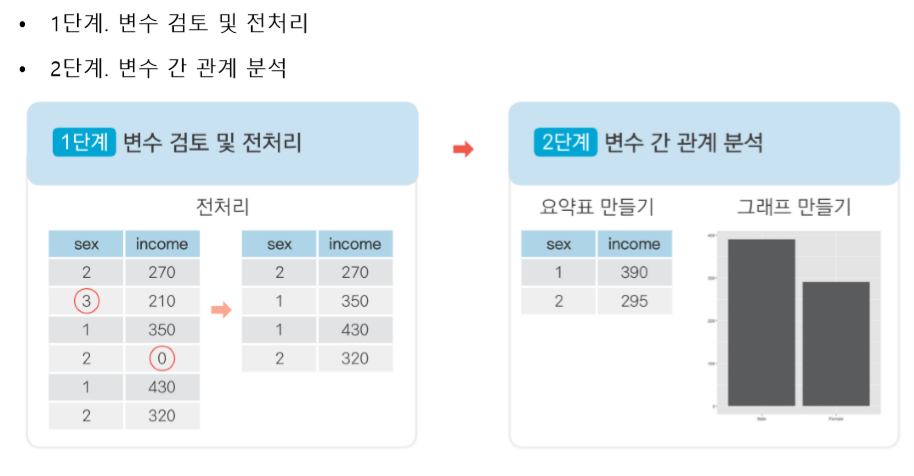

## 9-2. 성별에 따른 월급 차이- "성별에 따라 월급이 다를까?" 

### 분석 절차 
1. 변수 검토 및 전처리 
    - 성별 • 월급 
2. 변수 간 관계 분석 
    - 성별 월급 평균표 만들기 • 그래프 만들기 

### 성별 변수 검토 및 전처리

#### 1. 변수 검토하기

In [15]:
class(welfare$sex)

[1] "numeric"

In [16]:
table(welfare$sex)


   1    2 
7578 9086 

#### 2. 전처리

In [17]:
# 이상치 확인
table(welfare$sex) 


   1    2 
7578 9086 

In [18]:
# 이상치 결측 처리
welfare$sex <- ifelse(welfare$sex == 9, NA, welfare$sex) 

In [20]:
# 결측치 확인
table(is.na(welfare$sex))


FALSE 
16664 

In [22]:
# 성별 항목 이름 부여
welfare$sex <- ifelse(welfare$sex == 1, "male", "female") 
table(welfare$sex)


female   male 
  9086   7578 

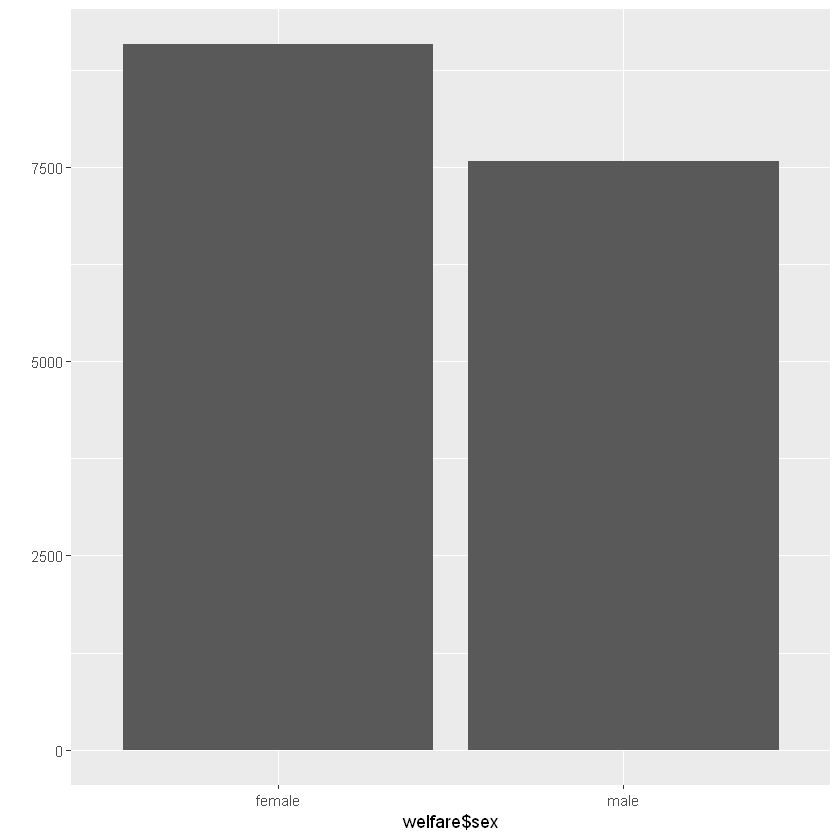

In [23]:
qplot(welfare$sex)

### 월급 변수 검토 및 전처리

#### 1. 변수 검토하기

In [26]:
class(welfare$income)

[1] "numeric"

In [27]:
summary(welfare$income) 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    0.0   122.0   192.5   241.6   316.6  2400.0   12030 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 12030 rows containing non-finite values (stat_bin)."

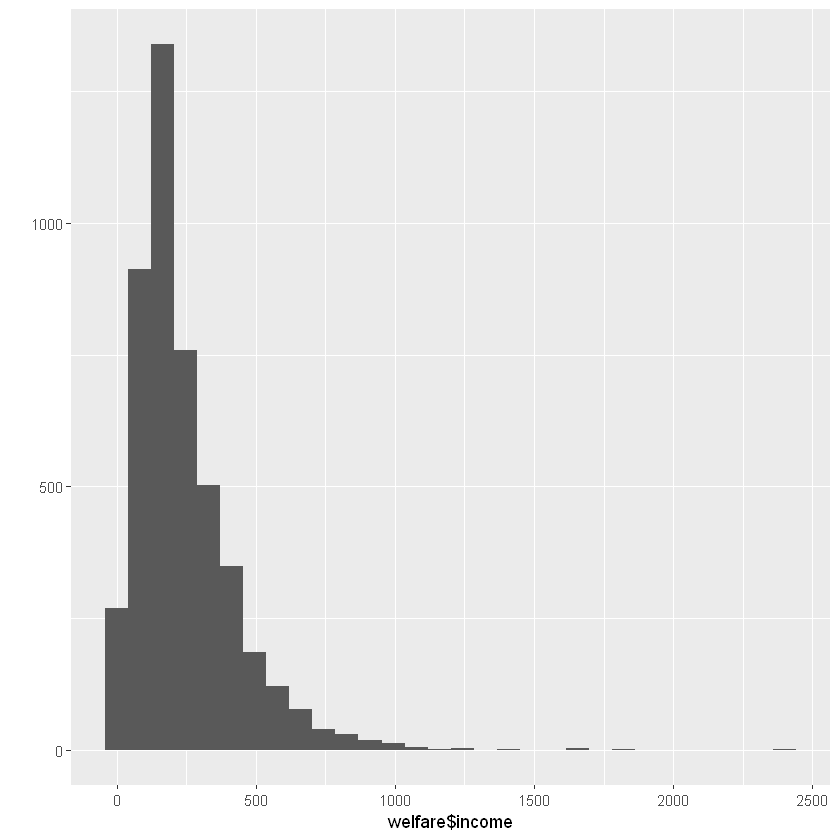

In [28]:
qplot(welfare$income)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 12051 rows containing non-finite values (stat_bin)."Warning message:
"Removed 2 rows containing missing values (geom_bar)."

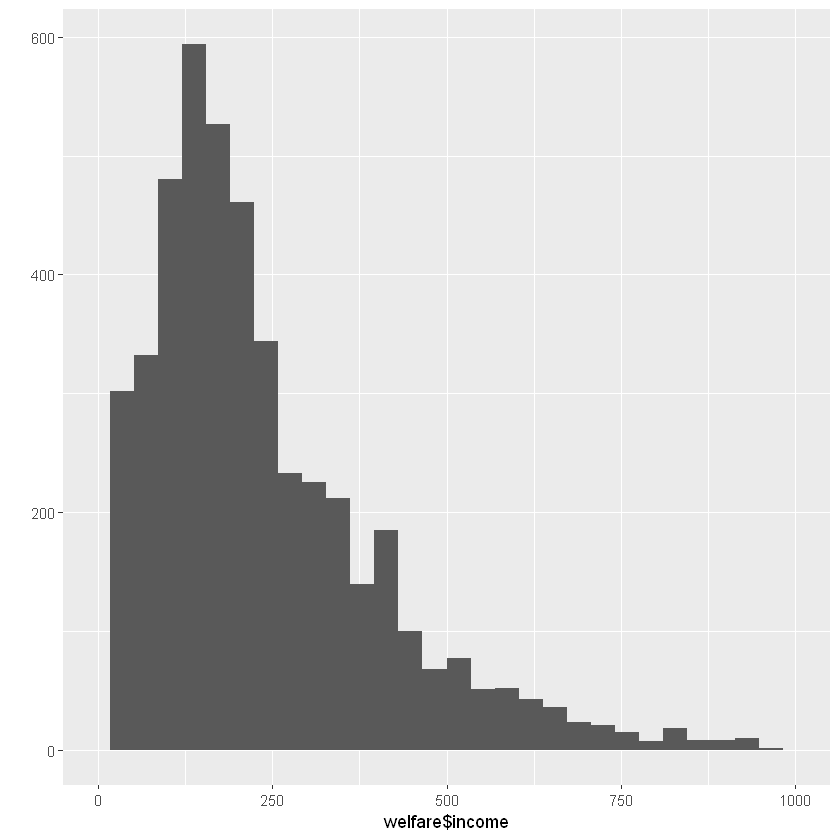

In [30]:
qplot(welfare$income) + xlim(0, 1000)

#### 2. 전처리 

In [32]:
# 이상치 확인
 summary(welfare$income)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    0.0   122.0   192.5   241.6   316.6  2400.0   12030 

In [33]:
# 이상치 결측 처리
 welfare$income <- ifelse(welfare$income %in% c(0, 9999), NA, welfare$income)

In [34]:
# 결측치 확인
 table(is.na(welfare$income))


FALSE  TRUE 
 4620 12044 

### 성별에 따른 월급 차이 분석하기

#### 1. 성별 월급 평균표 만들기 

In [38]:
sex_income <- welfare %>%
    filter(!is.na(income)) %>%
    group_by(sex) %>%
    summarise(mean_income = mean(income)) 
 
sex_income

sex,mean_income
female,163.2471
male,312.2932


In [39]:
#### 2. 그래프 만들기 

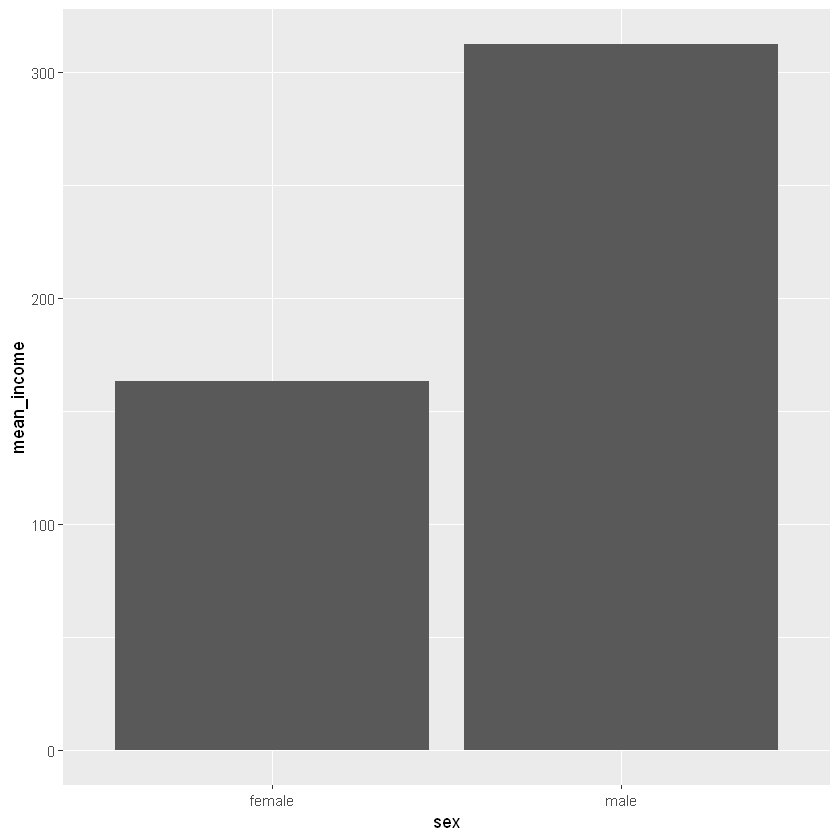

In [40]:
ggplot(data = sex_income, aes(x = sex, y = mean_income)) + geom_col()

## 9-3. 나이와 월급의 관계-"몇 살 때 월급을 가장 많이 받을까?"

### 분석 절차
1. 변수 검토 및 전처리 
    - 나이 
    - 월급 
2. 변수 간 관계 분석 
    - 나이에 따른 월급 평균표 만들기 
    - 그래프 만들기

#### 1. 변수 검토하기

In [43]:
class(welfare$birth)

[1] "numeric"

In [44]:
summary(welfare$birth) 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1907    1946    1966    1968    1988    2014 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


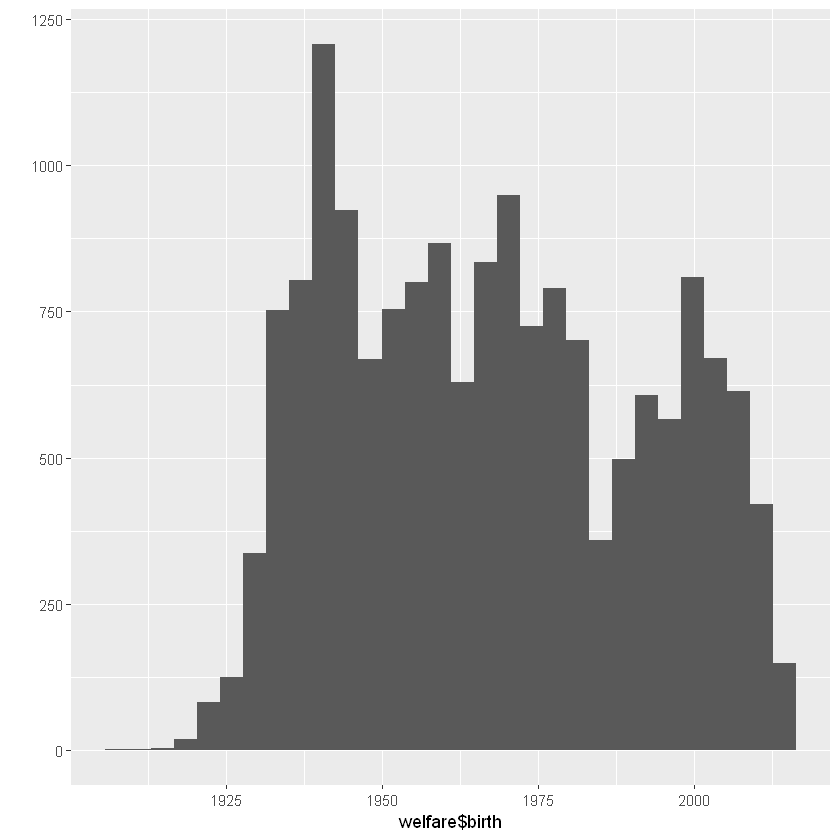

In [45]:
qplot(welfare$birth)

In [46]:
#### 2.전처리 

In [47]:
# 이상치 확인
summary(welfare$birth)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1907    1946    1966    1968    1988    2014 

In [48]:
# 결측치 확인
table(is.na(welfare$birth))


FALSE 
16664 

In [49]:
# 이상치 결측 처리
welfare$birth <- ifelse(welfare$birth == 9999, NA, welfare$birth) 
table(is.na(welfare$birth))


FALSE 
16664 

In [50]:
#### 3. 파생변수 만들기 - 나이 

In [51]:
welfare$age <- 2015 - welfare$birth + 1 
summary(welfare$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2.00   28.00   50.00   48.43   70.00  109.00 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


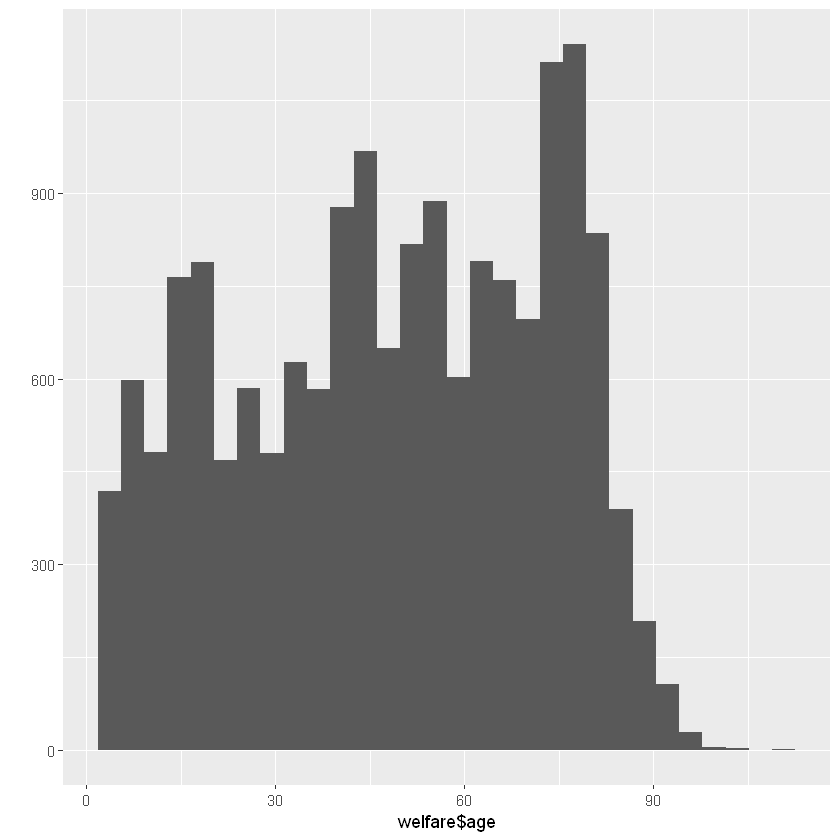

In [52]:
qplot(welfare$age)

In [53]:
### 나이와 월급의 관계 분석하기

In [54]:
#### 1. 나이에 따른 월급 평균표 만들기

In [55]:
age_income <- welfare %>%   filter(!is.na(income)) %>%   
    group_by(age) %>%   
    summarise(mean_income = mean(income))
    head(age_income)

age,mean_income
20,121.3000
21,105.5185
22,130.0923
23,141.7157
24,134.0877
25,144.6559


In [56]:
#### 2. 그래프 만들기 

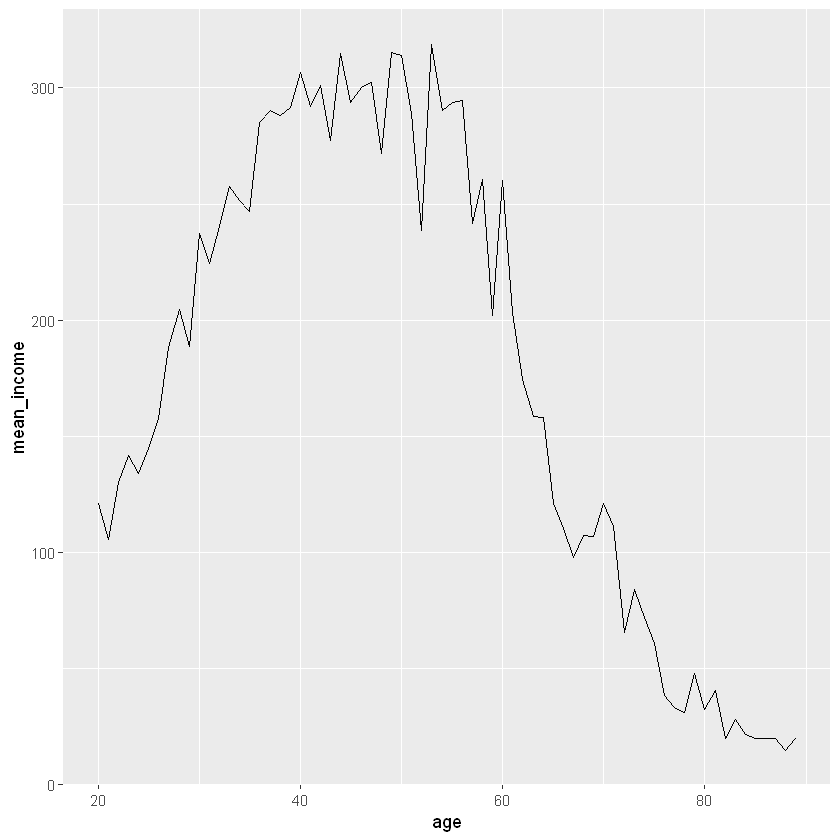

In [57]:
ggplot(data = age_income, aes(x = age, y = mean_income)) + geom_line()

In [58]:
## 9-4. 연령대에 따른 월급 차이-"어떤 연령대의 월급이 가장 많을까?"

### 분석 절차
1. 변수 검토 및 전처리 
    - 연령대 - 월급 
2. 변수 간 관계 분석 
    - 연령대별 월급 평균표 만들기 - 그래프 만들기 

In [61]:
### 연령대 변수 검토 및 전처리하기 

In [62]:
#### 파생변수 만들기 - 연령대

In [63]:
welfare <- welfare %>%
    mutate(ageg = ifelse(age < 30, "young",
                         ifelse(age <= 59, "middle", "old"))) 
 
table(welfare$ageg)


middle    old  young 
  6049   6281   4334 

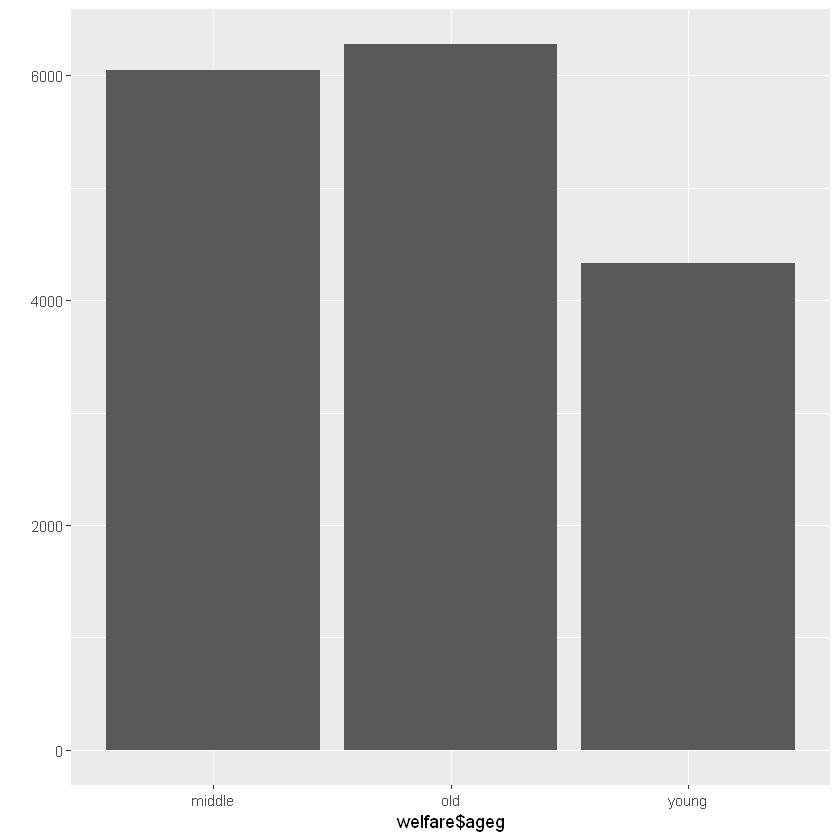

In [64]:
qplot(welfare$ageg)

In [65]:
### 연령대에 따른 월급 차이 분석하기

In [66]:
#### 1.연령대별 월급 평균표 만들기 

In [67]:
ageg_income <- welfare %>%
    filter(!is.na(income)) %>%
    group_by(ageg) %>%
    summarise(mean_income = mean(income)) 
 
ageg_income 

ageg,mean_income
middle,281.8871
old,125.3295
young,163.5953


In [68]:
#### 2. 그래프 만들기 

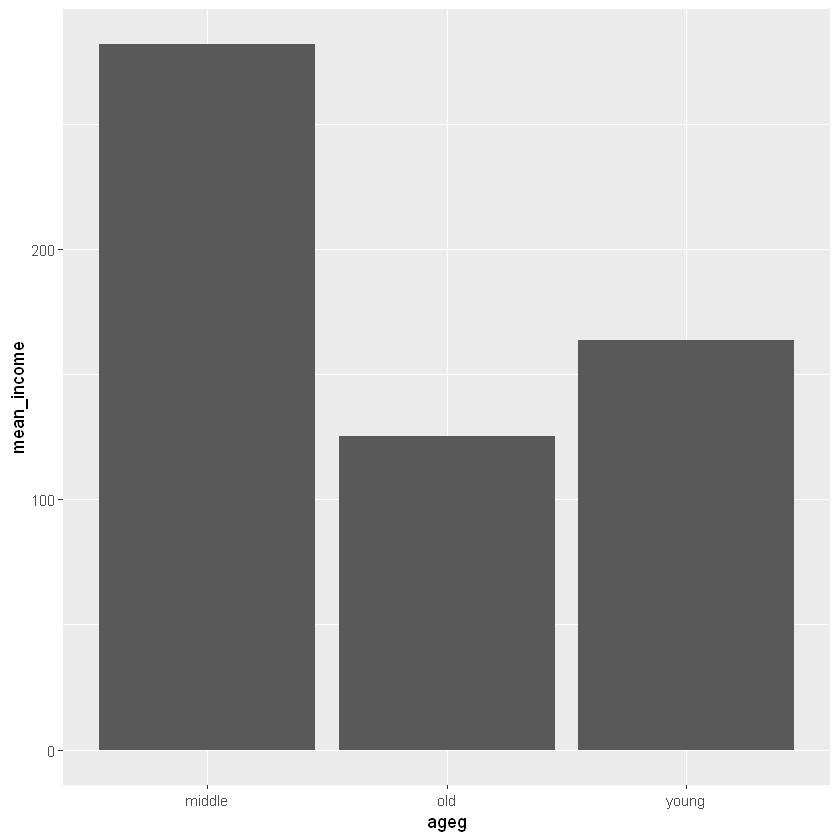

In [69]:
ggplot(data = ageg_income, aes(x = ageg, y = mean_income)) + geom_col()

In [70]:
#### 막대 정렬 : 초년, 중년, 노년 나이 순

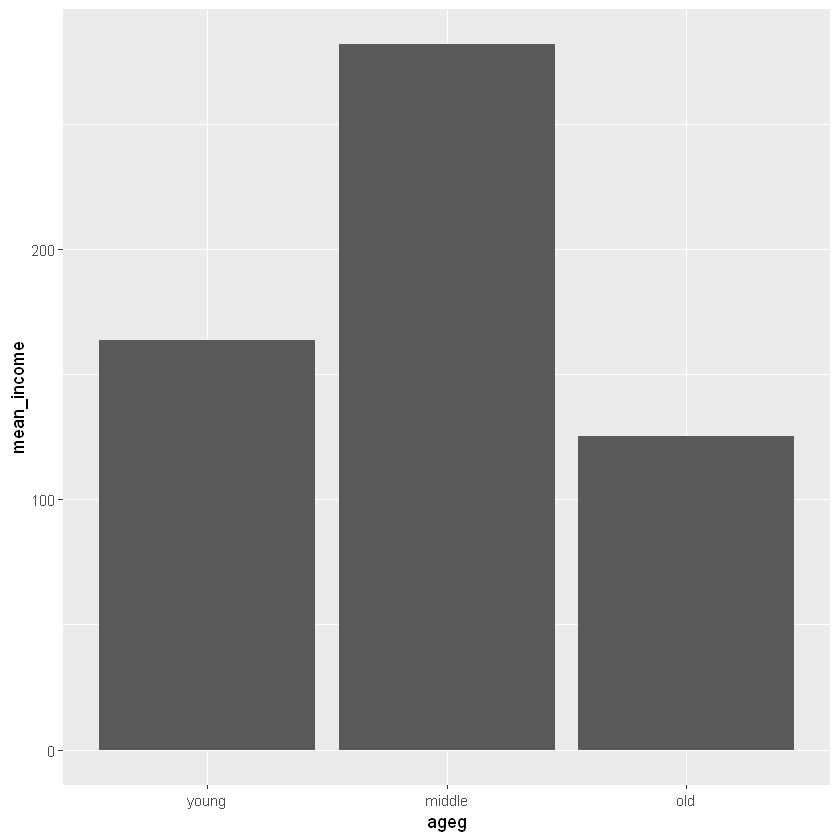

In [71]:
ggplot(data = ageg_income, aes(x = ageg, y = mean_income)) +
geom_col() +
scale_x_discrete(limits = c("young", "middle", "old"))

In [72]:
## 9-5. 연령대 및 성별 월급 차이 - "성별 월급 차이는 연령대별로 다를까?" 

In [73]:
### 분석 절차 
1. 변수 검토 및 전처리 
    - 연령대 
    - 성별 
    - 월급 
2. 변수 간 관계 분석 
    - 연령대 및 성별 월급 평균표 만들기 
    - 그래프 만들기

In [74]:
### 연령대 및 성별 월급 차이 분석하기

In [75]:
#### 1. 연령대 및 성별 월급 평균표 만들기 

In [77]:
sex_income <- welfare %>%
    filter(!is.na(income)) %>%
    group_by(ageg, sex) %>%
    summarise(mean_income = mean(income)) 
 
sex_income

ageg,sex,mean_income
middle,female,187.97552
middle,male,353.07574
old,female,81.52917
old,male,173.85558
young,female,159.50518
young,male,170.81737


In [78]:
#### 2. 그래프 만들기

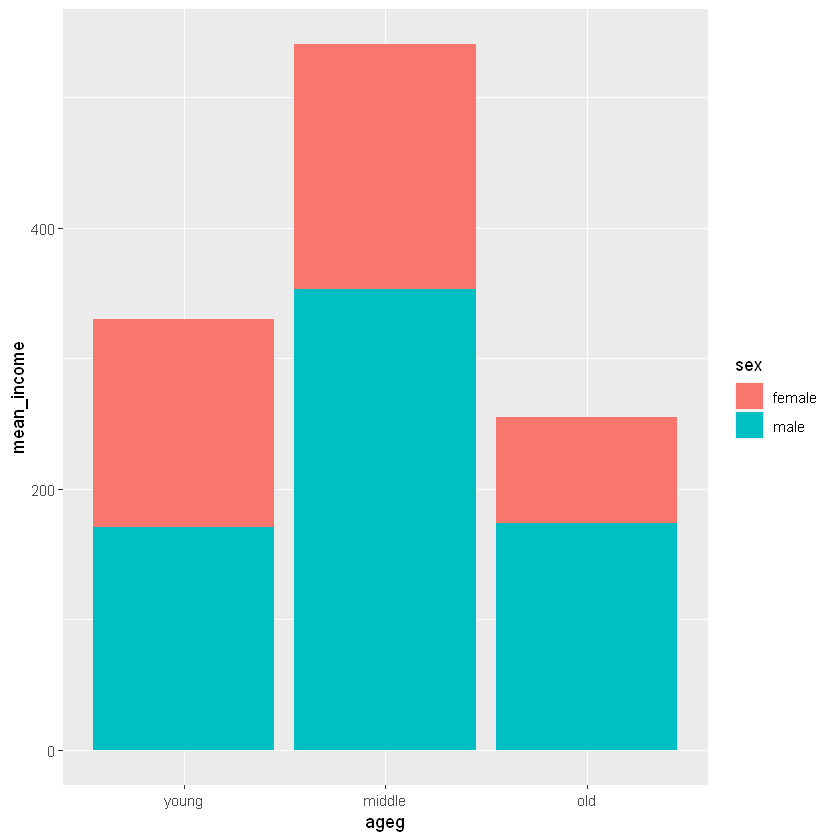

In [79]:
ggplot(data = sex_income, aes(x = ageg, y = mean_income, fill = sex)) +
    geom_col() +
    scale_x_discrete(limits = c("young", "middle", "old"))

In [80]:
#### 성별 막대 분리

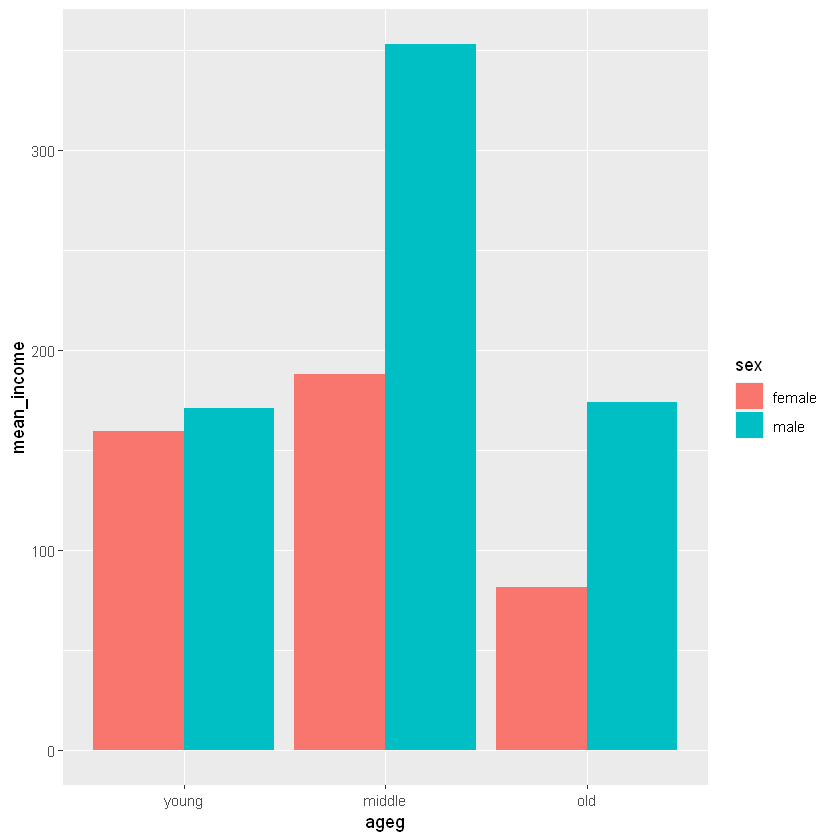

In [81]:
ggplot(data = sex_income, aes(x = ageg, y = mean_income, fill = sex)) +
    geom_col(position = "dodge") +
    scale_x_discrete(limits = c("young", "middle", "old")) 

In [82]:
### 나이 및 성별 월급 차이 분석하기 

In [83]:
# 성별 연령별 월급 평균표 만들기
 sex_age <- welfare %>%
    filter(!is.na(income)) %>%
    group_by(age, sex) %>%
    summarise(mean_income = mean(income))

In [84]:
head(sex_age) 

age,sex,mean_income
20,female,147.4500
20,male,69.0000
21,female,106.9789
21,male,102.0500
22,female,139.8547
22,male,118.2379


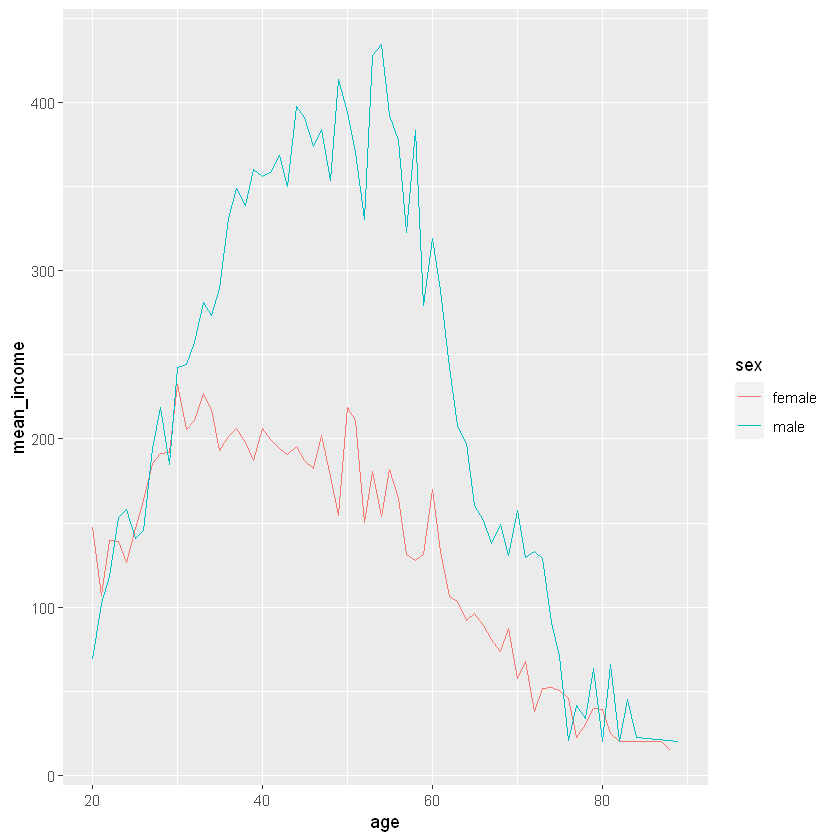

In [85]:
ggplot(data = sex_age, aes(x = age, y = mean_income, col = sex)) +
geom_line() 

## 9-6. 직업별 월급 차이-"어떤 직업이 월급을 가장 많이 받을까?" 

### 분석 절차 
1. 변수 검토 및 전처리 
    - 직업 - 월급 
2. 변수 간 관계 분석 
    - 직업별 월급 평균표 만들기 - 그래프 만들기

#### 1.변수 검토하기 